In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Understand what is the data set about   

    - The data set comprises of information on 7200 apps on App store with following imp details
        * "id" : App ID
        * "track_name": App Name
        * "size_bytes": Size (in Bytes)
        * "price": Price amount
        * "rating_count_tot": User Rating counts (for all version)
        * "prime_genre": Primary Genre

In [2]:
# read data from file
file_path = "AppleStore.csv"
df = pd.read_csv(file_path)

# Show first 5 lines
df.head()

,no.,id,track_name,size_bytes,currency,price,rating_count_tot,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,4.0,4.5,6.3.5,4+,Games,38
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,4.0,3.5,8.2.2,4+,Productivity,37
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,3.5,4.5,5.0.0,4+,Weather,37
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,4.0,4.5,5.10.0,12+,Shopping,37
4,5,282935706,Bible,92774400,USD,0.00,985920,4.5,5.0,7.5.1,4+,Reference,37


What about paid apps and free apps?

In [3]:
# Identify top 5 app categories based on total number of apps
top_genres = df['prime_genre'].value_counts().nlargest(5).index

# Filter data with only top categories
df_top = df[df['prime_genre'].isin(top_genres)]

# Calculate the number of free, paid and total apps
free = df_top[df_top['price'] == 0]['prime_genre'].value_counts().sort_index().to_frame()
paid = df_top[df_top['price'] > 0]['prime_genre'].value_counts().sort_index().to_frame()
total = df_top['prime_genre'].value_counts().sort_index().to_frame()

# Set column names for each DataFrame
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']

# Merge DataFrames into a distribution table
dist = free.join(paid).join(total)

# Calculate percentage of free and paid apps
dist['paid_per'] = dist['paid'] * 100 / dist['total']
dist['free_per'] = dist['free'] * 100 / dist['total']

dist

,free,paid,total,paid_per,free_per
prime_genre,,,,,
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Photo & Video,167,182,349,52.148997,47.851003
Utilities,109,139,248,56.048387,43.951613


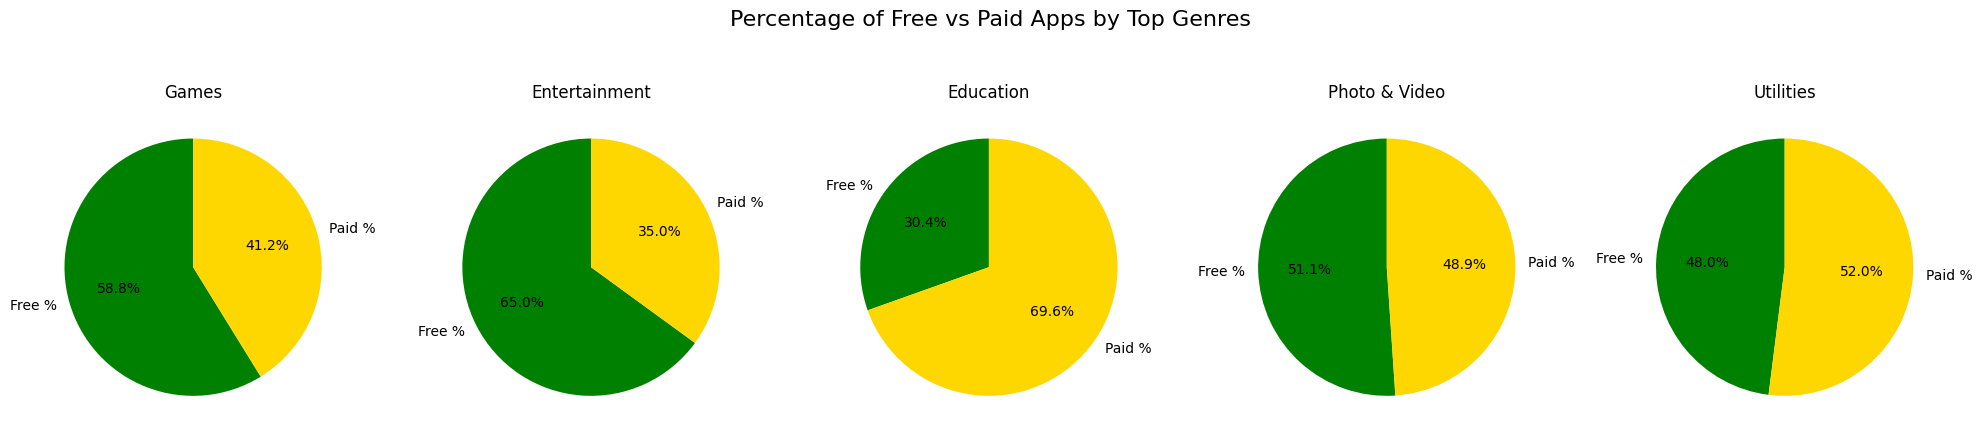

In [4]:
# free vs Paid Apps by Top Genres
def plot_free_vs_paid_by_genre(df, top_n=5):
    """
    Visualizes the percentage of free vs. paid apps in the top N genres
    """
    # Identify the top N genres by app count
    top_genres = df['prime_genre'].value_counts().index[:top_n]

    # Filter data to include only apps in the top N genres
    df_top = df[df['prime_genre'].isin(top_genres)]

    # Calculate the distribution of free and paid apps by genre
    genre_paid_free = df_top.groupby(['prime_genre', df_top['price'] == 0]).size().unstack(fill_value=0)
    genre_paid_free.columns = ['Paid', 'Free']
    genre_paid_free['Free %'] = (genre_paid_free['Free'] / genre_paid_free.sum(axis=1)) * 100
    genre_paid_free['Paid %'] = (genre_paid_free['Paid'] / genre_paid_free.sum(axis=1)) * 100

    # Plot pie charts for each genre
    fig, axes = plt.subplots(1, top_n, figsize=(20, 5))
    for ax, genre in zip(axes, top_genres):
        data = genre_paid_free.loc[genre, ['Free %', 'Paid %']]
        ax.pie(data, labels=['Free %', 'Paid %'], autopct='%1.1f%%', startangle=90, colors=['green', 'gold'])
        ax.set_title(genre)

    # Set a global title and adjust layout
    plt.suptitle("Percentage of Free vs Paid Apps by Top Genres", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_free_vs_paid_by_genre(df, top_n=5)


- Education has significant % of Paid apps
- On the contrary - Entertainment category hosts high % of free apps
